In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
from skimage.util import img_as_ubyte
from skimage.morphology import skeletonize
from skimage.util import invert
from skimage.segmentation import flood_fill
from PIL import Image

In [2]:
# Source https://github.com/jmlipman/LAID/blob/master/IP/Otsu/otsu.py
def otso_threshold(img):
    [hist, _] = np.histogram(img, bins=256, range=(0, 255))
    # Normalization so we have probabilities-like values (sum=1)
    hist = 1.0*hist/np.sum(hist)

    val_max = -999
    thr = -1
    for t in range(1,255):
        # Non-efficient implementation
        q1 = np.sum(hist[:t])
        q2 = np.sum(hist[t:])
        m1 = np.sum(np.array([i for i in range(t)])*hist[:t])/q1
        m2 = np.sum(np.array([i for i in range(t,256)])*hist[t:])/q2
        val = q1*(1-q1)*np.power(m1-m2,2)
        if val_max < val:
            val_max = val
            thr = t
    return thr

def binarize_img(img):
    copy_img = copy.deepcopy(img)
    tresh = otso_threshold(copy_img)

    for i in range(len(copy_img)):
        for j in range(len(copy_img[i])):
            if copy_img[i][j] >= tresh:
                copy_img[i][j] = 1
            else: 
                copy_img[i][j] = 0
    return copy_img

def convert_to_gray(img):
    r_img, g_img, b_img = copy.deepcopy(img), copy.deepcopy(img), copy.deepcopy(img)
    r_img = img[:, :, 0]
    g_img = img[:, :, 1]
    b_img = img[:, :, 2]
    intensity_img = 0.299*r_img + 0.587*g_img + 0.114*b_img
    
    return intensity_img

def get_binary_img(img_path):
    img = plt.imread(img_path)
    img = img_as_ubyte(img)
    gray_img = convert_to_gray(img)
    binary_img = binarize_img(gray_img)
    return binary_img

def skeletonize_img_path(img_path):
    binary_img = get_binary_img(img_path)
    skeleton = skeletonize(binary_img)
    invert_skeleton = invert(skeleton)
    
    return invert_skeleton

def skeletonize_img_array(img):
    skeleton = skeletonize(img)
    invert_skeleton = invert(skeleton)
    
    return invert_skeleton

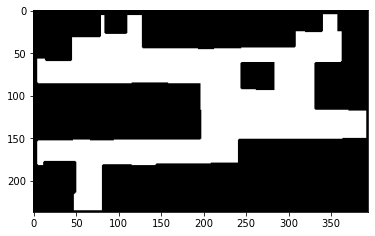

In [3]:
img = get_binary_img("floorplans/research_paper_sample_binarization.png")

plt.imshow(img, cmap='gray')
plt.show()

<ipython-input-2-2dd27459218c>:13: RuntimeWarning: invalid value encountered in double_scalars
  m1 = np.sum(np.array([i for i in range(t)])*hist[:t])/q1


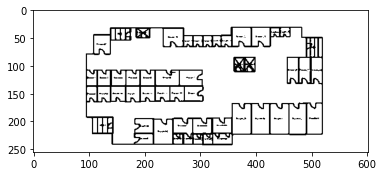

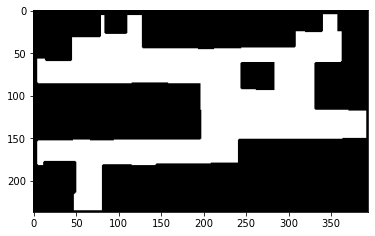

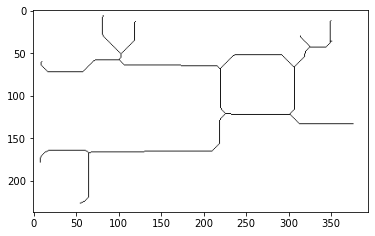

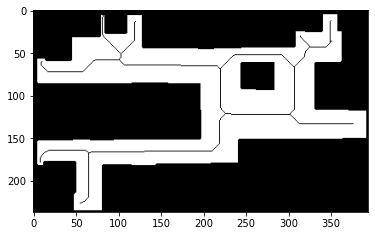

In [4]:
orig_img =  get_binary_img("floorplans/research_paper_sample.png")
plt.imshow(orig_img, cmap='gray')
plt.show()

img =  get_binary_img("floorplans/research_paper_sample_binarization.png")
plt.imshow(img, cmap='gray')
plt.show()

# perform skeletonization
skeleton_img = skeletonize_img_path("floorplans/research_paper_sample_binarization.png")
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

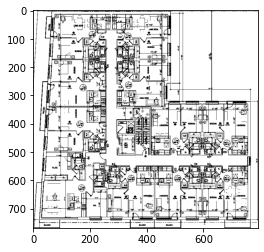

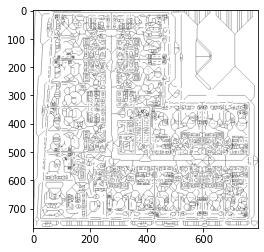

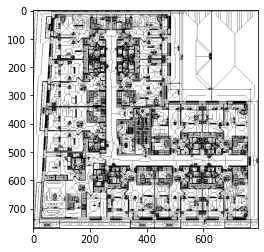

In [5]:
binary_img = get_binary_img('floorplans/floor_plan_sample.png')
plt.imshow(binary_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img_path('floorplans/floor_plan_sample.png')
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(binary_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

im = Image.fromarray(merged)
im.save("merged.png")

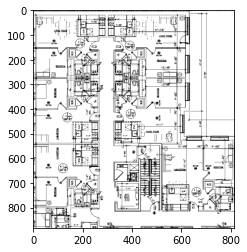

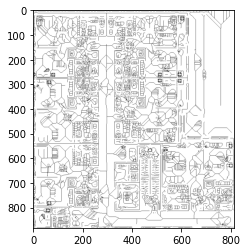

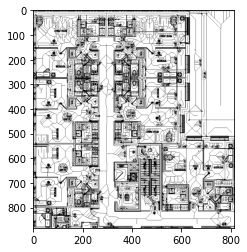

In [6]:
binary_img = get_binary_img('floorplans/floor_plan_sample_small.png')
plt.imshow(binary_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img_path('floorplans/floor_plan_sample_small.png')
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(binary_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

im = Image.fromarray(merged)
im.save("merged.png")

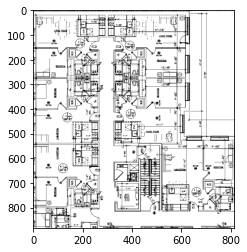

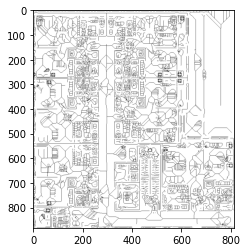

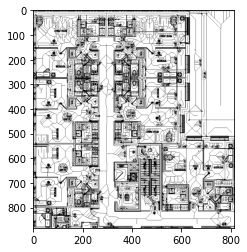

In [9]:
binary_img = get_binary_img('floorplans/floor_plan_sample_small.png')
plt.imshow(binary_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img_path('floorplans/floor_plan_sample_small.png')
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(binary_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

# from PIL import Image
# im = Image.fromarray(merged)
# im.save("merged.png")

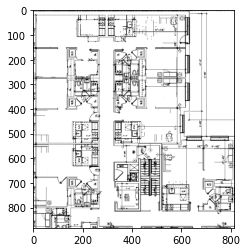

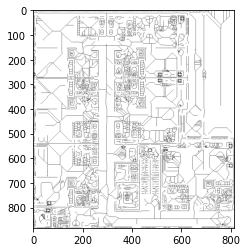

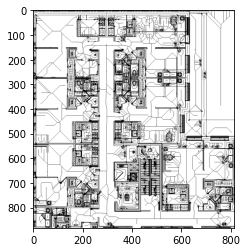

In [10]:
binary_img = get_binary_img('floorplans/floor_plan_sample_small_filtered_without_doors.png')
plt.imshow(binary_img, cmap='gray')
plt.show()

skeleton_img = skeletonize_img_path('floorplans/floor_plan_sample_small_filtered_without_doors.png')
plt.imshow(skeleton_img, cmap='gray')
plt.show()

merged = np.logical_and(binary_img, skeleton_img)
plt.imshow(merged, cmap='gray')
plt.show()

# from PIL import Image
im = Image.fromarray(merged)
im.save("merged_filtered_without_doors.png")

In [11]:
def duplicate_pixels(img, pixel_value, region_width):
    img_copy = copy.deepcopy(img)
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            if img[i][j] == pixel_value:
                fill_values(img_copy, pixel_value, region_width, i, j)
    return img_copy

def fill_values(img, new_pixel_value, region_width, i, j):
        half_width = region_width//2
        
        i_indices_current = max(i - half_width, 0)
        i_indices_end = min(i + half_width, img.shape[0] - 1)
        
        j_indices_current, j_indices_start = max(j - half_width, 0), max(j - half_width, 0)
        j_indices_end =  min(j + half_width, img.shape[1] - 1)

        while i_indices_current <= i_indices_end:
            while j_indices_current <= j_indices_end:
                img[i_indices_current][j_indices_current] = new_pixel_value          
                j_indices_current += 1
            j_indices_current = j_indices_start
            i_indices_current += 1
            
def volume_filler(img, filter_value, fill_value, max_volume):
    visited = {}
    img_copy = copy.deepcopy(img)
    for i in range(img_copy.shape[0]):
#         print('ith row {}'.format(i))
        for j in range(img_copy.shape[1]):
            if img_copy[i][j] == filter_value and not already_visited(visited, i, j):
                island_pixels = island_filler(img_copy, i, j, filter_value, fill_value, 1, visited, max_volume)
                if island_pixels is not None:
                    img_copy[i, j] = fill_value
                    for pixel in island_pixels:
                        img_copy[pixel[0], pixel[1]] = fill_value
    return img_copy

def check_for_continous(row, filter_value, max_volume):
    continous_count = 0
    for i in row:
        if i != filter_value:
            if continous_count >= 1 and continous_count <= max_volume:
                return True
            continous_count = 0
        else:
            continous_count += 1
    return False

def island_filler(img, i, j, island_value, fill_value, current_count, visited, max_treshhold):
    # Pixel has 8 surrounding pixels
    surrounding_islands = []
    if within_boundaries(img, i-1, j-1) and (img[i-1][j-1] == island_value and not already_visited(visited, i-1, j-1)):
        surrounding_islands.append((i-1, j-1))
        set_visited(visited, i-1, j-1)
    if within_boundaries(img, i-1, j) and (img[i-1][j] == island_value and not already_visited(visited, i-1, j)):
        surrounding_islands.append((i-1, j))
        set_visited(visited, i-1, j)
    if within_boundaries(img, i-1, j+1) and (img[i-1][j+1] == island_value and not already_visited(visited, i-1, j+1)):
        surrounding_islands.append((i-1, j+1))
        set_visited(visited, i-1, j+1)
    
    if within_boundaries(img, i, j-1) and (img[i][j-1] == island_value and not already_visited(visited, i, j-1)):
        surrounding_islands.append((i, j-1))
        set_visited(visited, i, j-1)
    if within_boundaries(img, i, j+1) and (img[i][j+1] == island_value and not already_visited(visited, i, j+1)):
        surrounding_islands.append((i, j+1))
        set_visited(visited, i, j+1)
    
    if within_boundaries(img, i+1, j-1) and (img[i+1][j-1] == island_value and not already_visited(visited, i+1, j-1)):
        surrounding_islands.append((i+1, j-1))
        set_visited(visited, i+1, j-1)
    if within_boundaries(img, i+1, j) and (img[i+1][j] == island_value and not already_visited(visited, i+1, j)):
        surrounding_islands.append((i+1, j))
        set_visited(visited, i+1, j)
    if within_boundaries(img, i+1, j+1) and (img[i+1][j+1] == island_value and not already_visited(visited, i+1, j+1)):
        surrounding_islands.append((i+1, j+1))
        set_visited(visited, i+1, j+1)

    current_count += len(surrounding_islands)
    
    if current_count > max_treshhold:
        return None
    for island in surrounding_islands:
        islands = island_filler(img, island[0], island[1], island_value, fill_value, current_count, visited, max_treshhold)
        if islands is None:
            return None
        else:
            surrounding_islands += islands
    return surrounding_islands

def set_visited(visited, i, j):
    if i not in visited:
        visited[i] = {}
    visited[i][j] = True

def already_visited(visited, i, j):
    return i in visited and j in visited[i]
    
def within_boundaries(img, i, j):
    return i >= 0 and i < img.shape[0] and j >= 0 and j < img.shape[1]

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

from dijkstar import Graph, find_path

def create_vertices(img, wipeout_value, radius=4):
    visited = {}
    vertices = {}
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] != wipeout_value and not is_visited(visited, i, j):
                set_visited(vertices, i, j)
                set_visited(visited, i, j)
                erase_surrounding(img, radius, wipeout_value, i, j, visited)
    return [(i, j) for i in vertices for j in vertices[i] ]
                
def erase_surrounding(img, radius, wipeout_value, i, j, visited):
    i_start = max(0, i-radius)
    i_end = min(img.shape[0], i+radius)
    j_start = max(0, j-radius)
    j_end = min(img.shape[1], j+radius)
    for i_curr in range(i_start, i_end):
        for j_curr in range(j_start, j_end):
            if is_visited(visited, i_curr, j_curr):
                continue
            if math.hypot(i - i_curr, j - j_curr) < radius:
                set_visited(visited, i_curr, j_curr)
                img[i_curr][j_curr] = wipeout_value

def is_visited(visited, i, j):
    return i in visited and j in visited[i]

def set_visited(visited, i, j):
    if i not in visited:
        visited[i] = {}
    visited[i][j] = True

class Edge:
    def __init__(self, coordinates, distance):
        self.coordinates = coordinates
        self.distance = distance
    
    def get_coordinates(self):
        return self.coordinates

    def get_distance(self):
        return self.distance
    
class Node:
    def __init__(self, coordinates):
        self.edges = []
        self.coordinates = coordinates

    def get_coordinates(self):
        return self.coordinates
        
    def add_edge(self, edge):
        self.edges.append(edge)
        
    def get_edges(self):
        return self.edges

def create_nodes_and_edges(vertices, radius):
    nodes = []
    for i, vertex in enumerate(vertices):
        current_node = Node(vertex)
        nodes.append(current_node)
        for j in range(len(vertices)):
            if i == j:
                continue
            other_vertex =  vertices[j]
            curr_distance = math.hypot(vertex[0] - other_vertex[0], vertex[1] - other_vertex[1])
            if  curr_distance <= (radius*2):
                current_node.add_edge(Edge(other_vertex, curr_distance))
    return nodes
        
def plot_nodes(nodes_and_edges, dot_color="blue", line_color="red"):
    for node in nodes_and_edges:
        node_coordinates = node.get_coordinates()
        for edge in node.get_edges():
            edge_coordinates = edge.get_coordinates()
            plt.plot(node_coordinates[1], node_coordinates[0], marker='.', color=dot_color)
            plt.plot(edge_coordinates[1], edge_coordinates[0], marker='.', color=dot_color)
            x = [node_coordinates[1], edge_coordinates[1]]
            y = [node_coordinates[0], edge_coordinates[0]]
            plt.plot(x, y, color=line_color, linewidth=2)
            
class NodeBag:  
    def __init__(self):
        self.node_coord_to_id = {}
        self.node_id_to_coord = {}
        self.node_counter = 0

    def get_node_id(self, coordinates):
        if coordinates[0] not in self.node_coord_to_id:
            self.node_coord_to_id[coordinates[0]] = {}
        if coordinates[1] not in self.node_coord_to_id[coordinates[0]]:
            self.node_coord_to_id[coordinates[0]][coordinates[1]] = self.node_counter
            self.node_id_to_coord[self.node_counter] = coordinates
            self.node_counter += 1
        return self.node_coord_to_id[coordinates[0]][coordinates[1]]
    
    def get_coordinates(self, node_id):
        return self.node_id_to_coord[node_id]
    
def get_node(node_dictionary, i, j):
    if i not in node_dictionary:
        node_dictionary[i] = {}
    node_dictionary[i][j] = True

def find_shortest_path_to_node(source_node, nodes):
    min_distance = None
    min_coordinate = None
    for node in nodes:
        other_node = node.get_coordinates()
        curr_distance = math.hypot(source_node[0] - other_node[0], source_node[1] - other_node[1])
        if min_distance is None or curr_distance <= min_distance:
            min_distance = curr_distance
            min_coordinate = other_node
    return min_coordinate
    
def shortest_path(nodes_and_edges, source_coordinates, destination_coordinates):
    graph = Graph()
    unique_node_count = 0
    node_bag = NodeBag()
    
    source_coordinates = find_shortest_path_to_node(source_coordinates, nodes_and_edges)
    destination_coordinates = find_shortest_path_to_node(destination_coordinates, nodes_and_edges)
    
    for node in nodes_and_edges:
        node_coordinates = node.get_coordinates()
        for edge in node.get_edges():
            edge_coordinates = edge.get_coordinates()
            edge_distance = edge.get_distance()
            
            node_id = node_bag.get_node_id(node_coordinates)
            edge_node_id = node_bag.get_node_id(edge_coordinates)
            graph.add_edge(node_id, edge_node_id, edge_distance)

    path = find_path(graph, node_bag.get_node_id(source_coordinates), node_bag.get_node_id(destination_coordinates))
    return [node_bag.get_coordinates(node_id) for node_id in path.nodes] 

def plot_path(nodes, dot_color="blue", line_color="red"):
    last_node = None
    for node_coordinates in nodes:
        plt.plot(node_coordinates[1], node_coordinates[0], marker='.', color=dot_color)
        if last_node is not None:
            x = [last_node[1], node_coordinates[1]]
            y = [last_node[0], node_coordinates[0]]
            plt.plot(x, y, color=line_color, linewidth=2)
        last_node = node_coordinates

def plot_source_and_destination(source_coordinate, destination_coordinate):
    plt.plot(source_coordinate[1], source_coordinate[0], marker='*', color='green')
    plt.plot(destination_coordinate[1], destination_coordinate[0], marker='*', color='green')
    
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

def get_color_coordinates(img_path, coordinate_color):
    img = plt.imread(img_path)
    img = img_as_ubyte(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rgb = rgb_to_hex((img[i][j][0], img[i][j][1], img[i][j][2]))
            if rgb == coordinate_color:
                return (i, j)

binary image



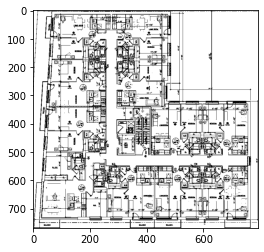

duplicated pixels binary image



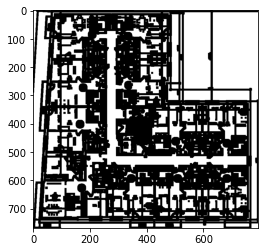

Skeleton image



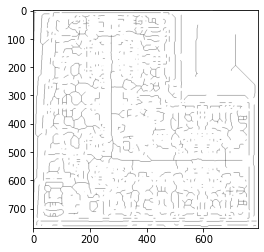

Original image with shortest path



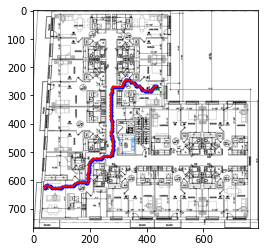

In [13]:
# Now to define the API 
def find_shortest_path(filepath):
    source_coordinates = get_color_coordinates(filepath, '00ff00')
    destination_coordinates = get_color_coordinates(filepath, 'ff0000')

    img = plt.imread(filepath)
    img = img_as_ubyte(img)
    gray_img = convert_to_gray(img)
    binary_img = binarize_img(gray_img)
    print("binary image\n")
    plt.imshow(binary_img, cmap=cm.gray)
    plt.show()
    dupe_binary_img = duplicate_pixels(binary_img, 0, 6)
    
    print("duplicated pixels binary image\n")
    plt.imshow(dupe_binary_img, cmap=cm.gray)
    plt.show()
    filled_img = dupe_binary_img

    skeleton_img = skeletonize_img_array(filled_img)
    
    print("Skeleton image\n")
    plt.imshow(skeleton_img, cmap=cm.gray)
    plt.show()

    radius = 5
    vertices = create_vertices(skeleton_img, 1, radius)
    nodes_and_edges = create_nodes_and_edges(vertices, radius)    
    shortest_path_list = shortest_path(nodes_and_edges, source_coordinates, destination_coordinates)
    
    print("Original image with shortest path\n")
    plt.imshow(img, cmap=cm.gray)
    plot_source_and_destination(source_coordinates, destination_coordinates)
    plot_path(shortest_path_list)
    plt.show()
    
find_shortest_path("floorplans/floor_plan_sample_test.png")